# The following is a simulation the Monty Hall problem so my sister can see that it makes sense.

   The Monty Hall as described by Wikipedia: 
   
>"Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?"

   At first, it seems that switching wouldn't make a difference. Computationally, though, we'll see that switching doors is a better choice. To demonstrate this, we'll split the problem into 2 scenarios—one in which you *always* stay with your initial guess and another in which you *always* switch to another door after the host reveals one that does not contain a prize.

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import random
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Case 1: Player does not switch

In [2]:
def games_no_switch():
    results = []
    for i in xrange(1000):   
        correct_door = random.choice([1,2,3])
        contestant_choice = random.choice([1,2,3])

        if contestant_choice == correct_door:
            results.append(True)
        else:
            results.append(False)
    return np.mean(results)

In [3]:
# 1000 trials of 1000 games
no_switch_results = [games_no_switch() for i in xrange(1000)]

Distribution is centered on 0.333989


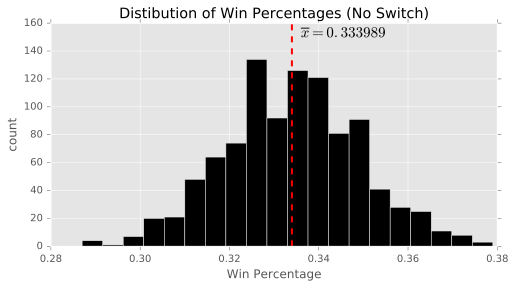

In [10]:
sample_mean = np.mean(no_switch_results)

plt.rcParams['figure.figsize'] = 8, 4
plt.hist(no_switch_results, bins=20, color='black')
plt.vlines(sample_mean, 0, 160, linestyles='--', color='red', linewidth=2)
plt.text(sample_mean + .002, 150, '$\overline{x}=%s$' % sample_mean, size=15)

plt.xlabel('Win Percentage')
plt.ylabel('count')

plt.title('Distibution of Win Percentages (No Switch)')
print 'Distribution is centered on {}'.format(np.mean(no_switch_results))

The player wins about 1/3 of the time

## Case 2: Player switches doors

   The `if else` statement in the following function takes a second to understand. If you selected the correct door initially, switching to another will cause you to lose. If you chose an incorrect door initially, **switching  will always cause you to win**. You selected one incorrect door and the host opens the other (he cannot open the door with the prize because that would ruin the gameshow). The door you switch to is the only one left—the one with the prize behind it.

In [6]:
#player switches doors every game
def games_with_switch():
    
    results = []
    for i in xrange(1000):
        correct_door = random.choice([1,2,3])
        player_initial = random.choice([1,2,3])

        if player_initial == correct_door:
            results.append(False)
        else:
            results.append(True)
    return np.mean(results)

In [7]:
games_with_switch()

0.67900000000000005

In [8]:
switch_results = [games_with_switch() for i in xrange(1000)]

Distribution is centered on 0.665991


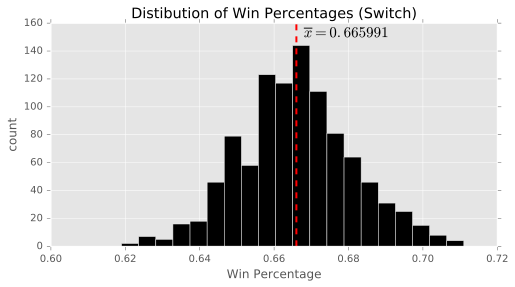

In [11]:
sample_mean = np.mean(switch_results)

plt.hist(switch_results, bins=20, color='black')
plt.vlines(sample_mean, 0, 160, linestyles='--', color='red', linewidth=2)
plt.text(sample_mean + .002, 150, '$\overline{x}=%s$' % sample_mean, size=15)

plt.xlabel('Win Percentage')
plt.ylabel('count')

plt.title('Distibution of Win Percentages (Switch)')
print 'Distribution is centered on {}'.format(np.mean(switch_results))

Player wins about 2/3 of the time

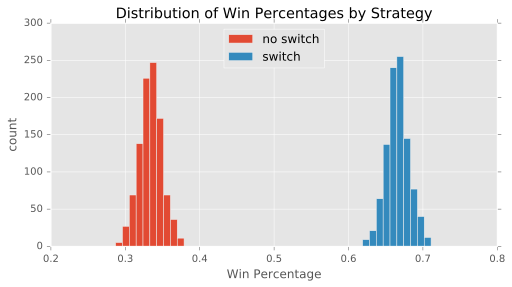

In [17]:
plt.hist(no_switch_results, label='no switch')
plt.hist(switch_results, label='switch')

plt.xlabel('Win Percentage')
plt.ylabel('count')
plt.title('Distribution of Win Percentages by Strategy')
plt.legend(loc='upper center');

   In conclusion, switching doors doubles one's chances of winning the prize. If you switch, **you are betting that you initially guessed incorrectly**. The chances of you guessing incorrectly are 2/3 as opposed to the 1/3 probability that you guessed correctly at the outset.